In [1]:
from centrex_tlf import transitions, couplings, lindblad, utils
import numpy as np

In [2]:
P2 = transitions.OpticalTransition(transitions.OpticalTransitionType.P, 2, 3 / 2, 1)
J12 = transitions.MicrowaveTransition(1, 2)
J23 = transitions.MicrowaveTransition(2, 3)
transition_selectors = couplings.generate_transition_selectors(
    [P2, J12, J23],
    [
        [couplings.polarization_Z],
        [
            (couplings.polarization_X - couplings.polarization_Z).normalize(),
            couplings.polarization_Y,
        ],
        [
            (couplings.polarization_X + couplings.polarization_Z).normalize(),
            couplings.polarization_Y,
        ],
    ],
)
system = lindblad.generate_OBE_system_transitions([P2, J12, J23], transition_selectors)

In [3]:
system.H_symbolic

Matrix([
[-79364116821.7869,                 0,                 0,                 0,                                                                                                  0,                                                                                                   0,                                                                                                      0,                                                                                                    0,                                                                                                     0,                                                                                                   0,                                                                                                     0,                                                                                                   0,                                                                                                    

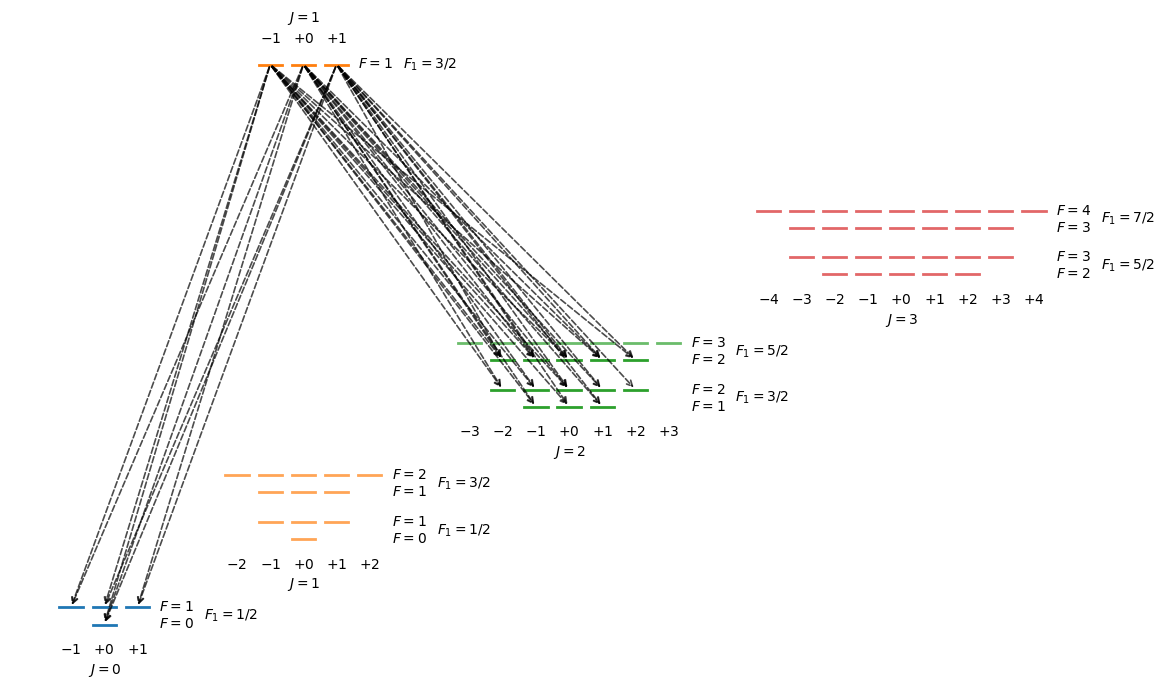

In [4]:
BR = system.C_array.sum(axis=0)
BR = np.sqrt(BR) / np.sqrt(BR).sum()
ax = utils.plotting.plot_level_diagram(
    [qn.largest for qn in system.QN],
    None,
    branching_ratio=BR,
)

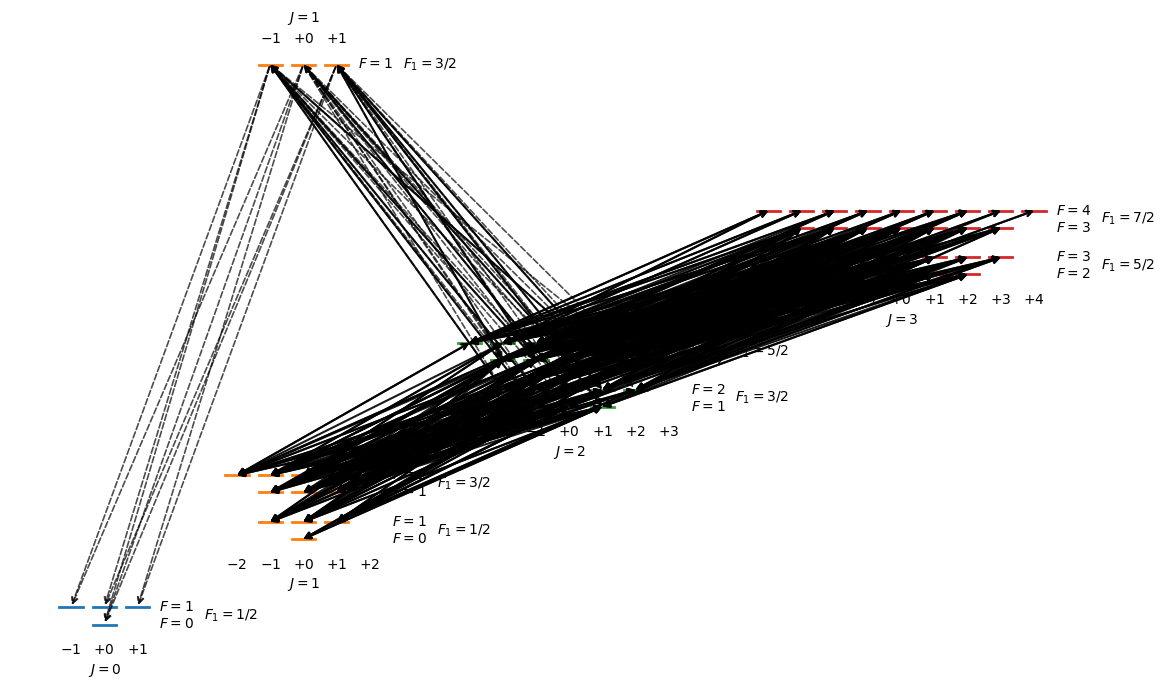

In [5]:
cpl_mats = [field.field for cpl in system.couplings for field in cpl.fields]
ax = utils.plotting.plot_level_diagram(
    [qn.largest for qn in system.QN],
    cpl_mats,
    branching_ratio=BR,
)

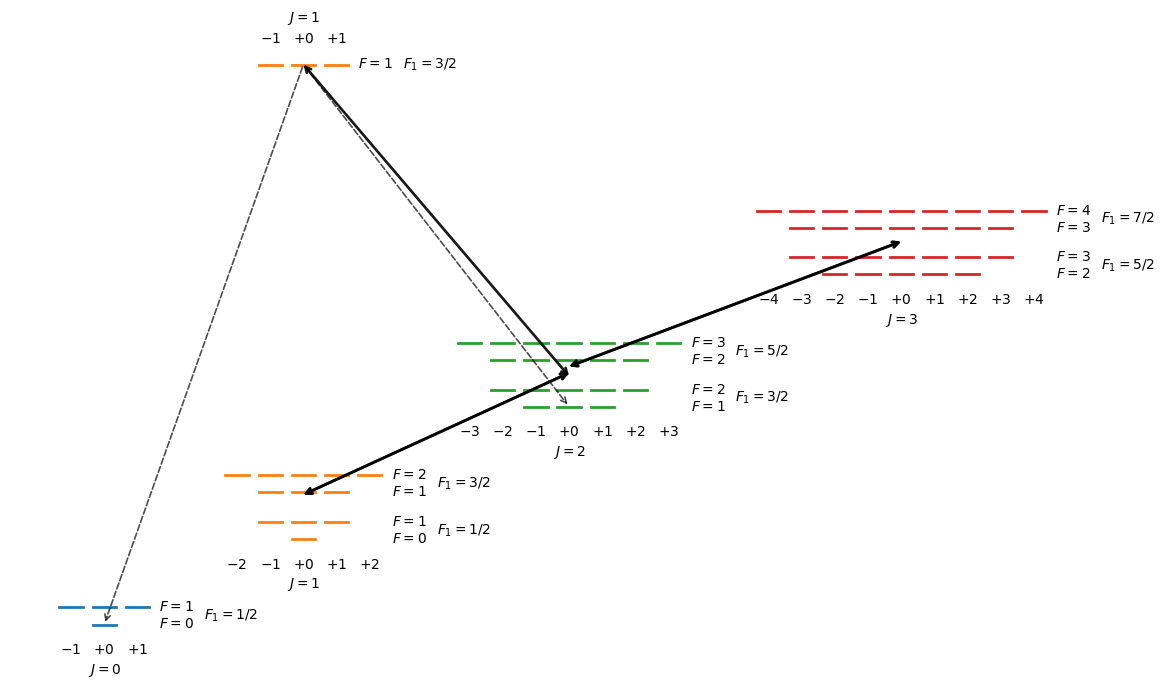

In [6]:
cpl_mats = [field.field for cpl in system.couplings for field in cpl.fields]
ax = utils.plotting.plot_level_diagram(
    [qn.largest for qn in system.QN],
    cpl_mats,
    branching_ratio=BR,
    collapse_decay_to_J=True,
    collapse_couplings_to_J=True,
)